In [23]:
import pandas as pd
import matplotlib.pyplot as plt

incident_data = pd.read_csv('Resources/Combined_Table.csv')
incident_data.head()

,Incident_ID,Company,Incident_Date,Ride_Name,Theme_Park,Age,Gender,Description,Pre_Existing_Condition,Passed_Away,Before_During_After,Lat_Long,Lat,Long
0,1,Universal,2001-12-29,Caro-Seuss-el,Islands of Adventure,52,F,broken arm,N,N,Not Specified,"28.473019479946934, -81.46912794980811",28.473019,-81.469128
1,2,Disney World,2002-01-04,The Twilight Zone Tower of Terror,Hollywood Studios,47,F,"anxiety & claustrophobia, atrial fibrilation",N,N,Not Specified,"28.360382462440796, -81.5598948783851",28.360382,-81.559895
2,3,Universal,2002-02-10,Dudley Do Rights Ripsaw Falls,Islands of Adventure,55,F,complained of lower back pain.,N,N,Not Specified,"28.469371941346193, -81.4714516228227",28.469372,-81.471452
3,4,Universal,2002-03-22,E.T Adventure,Universal Studios,13,M,injured right foot.,N,N,Not Specified,"28.477695013144068, -81.46610247864369",28.477695,-81.466102
4,5,Disney World,2002-03-29,Surf Pool,Typhoon Lagoon,16,F,c/o neck pain,N,N,Not Specified,"28.366195077472007, -81.5295786721928",28.366195,-81.529579


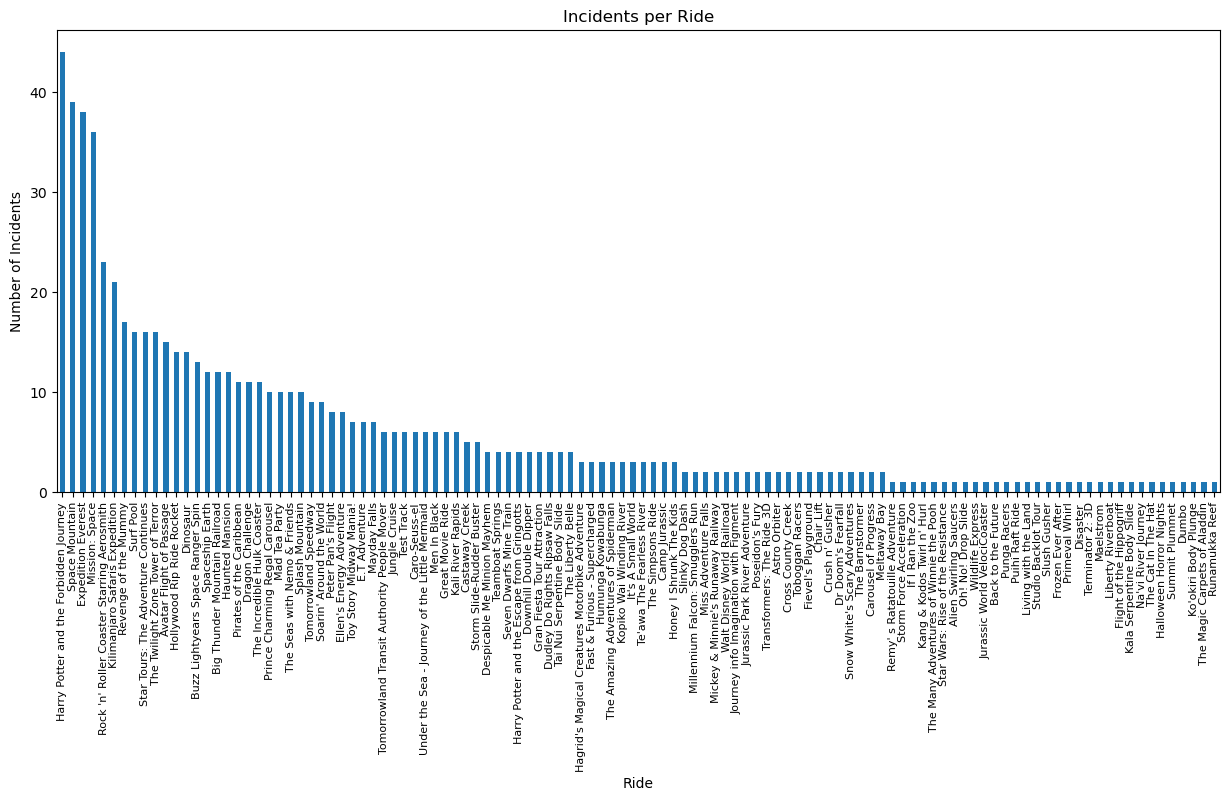

In [24]:
# Count incidents per ride
ride_counts = incident_data['Ride_Name'].value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(15, 6))
ride_counts.plot(kind='bar')
plt.title('Incidents per Ride')
plt.xlabel('Ride')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90, fontsize=8)
plt.show()

# Save image to folder



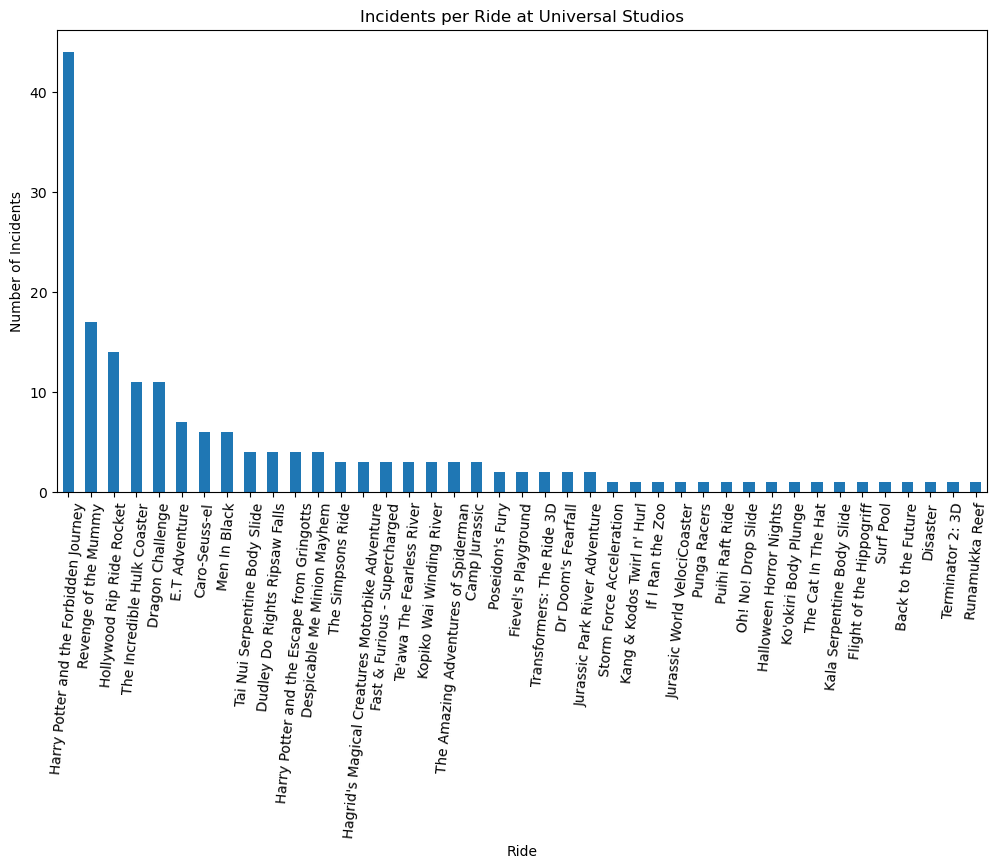

In [25]:
# Filter the data for incidents at Universal Studios
universal_df = incident_data[incident_data['Company'] == 'Universal']

# Count number of incidents per ride
ride_counts_universal = universal_df['Ride_Name'].value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(12, 6))
ride_counts_universal.plot(kind='bar')
plt.title('Incidents per Ride at Universal Studios')
plt.xlabel('Ride')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=85)
plt.show()

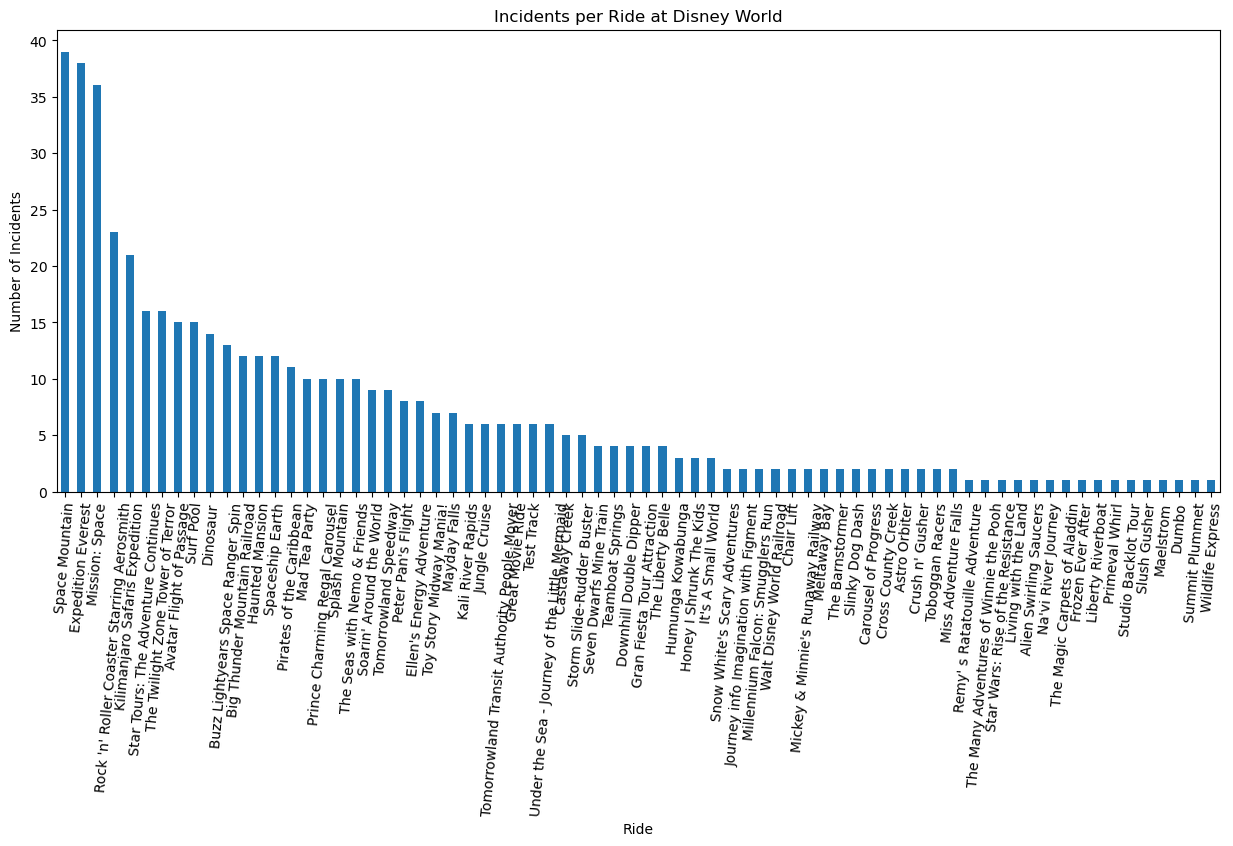

In [26]:
# Filter the data for incidents at Disney World
disney_df = incident_data[incident_data['Company'] == 'Disney World']

# Count number of incidents per ride
ride_counts_disney = disney_df['Ride_Name'].value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(15, 6))
ride_counts_disney.plot(kind='bar')
plt.title('Incidents per Ride at Disney World')
plt.xlabel('Ride')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=85)
plt.show()

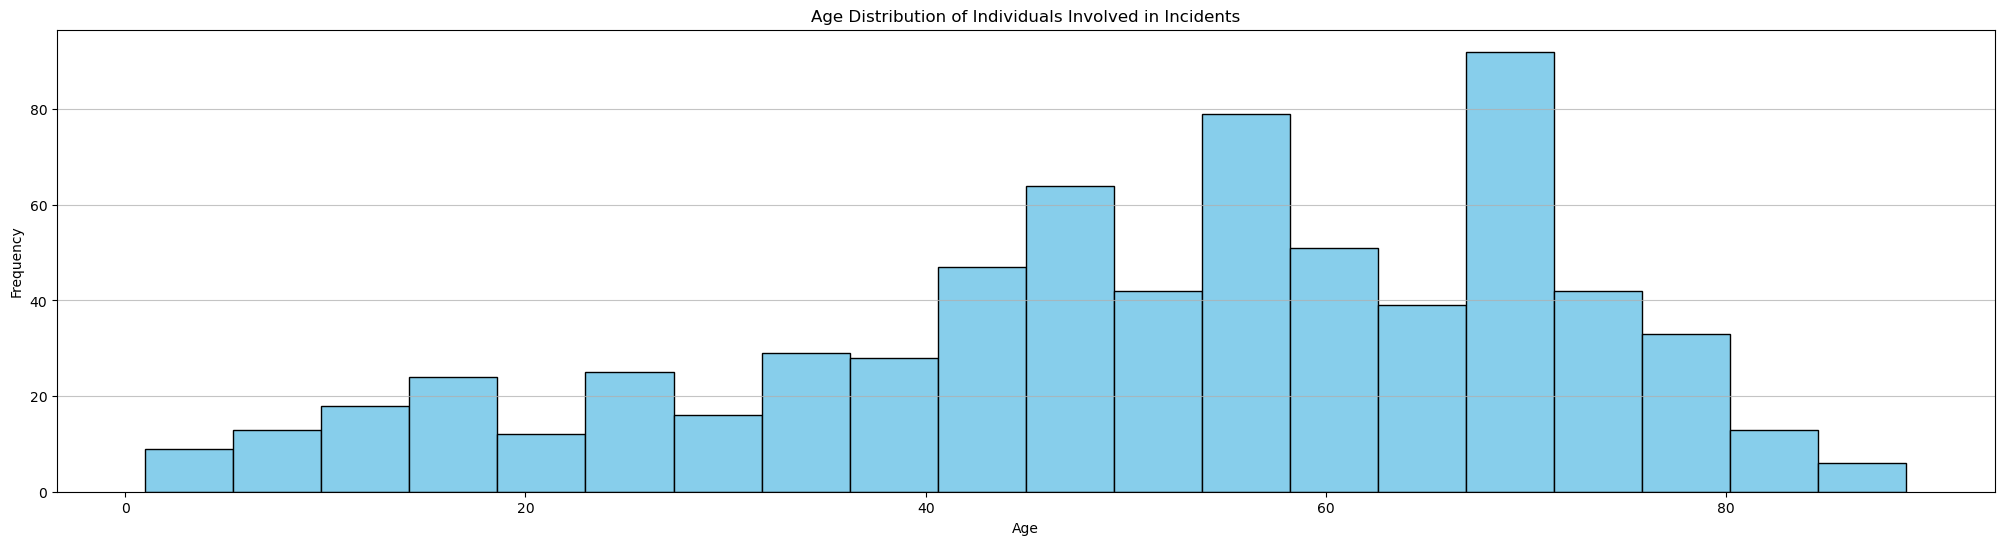

In [27]:
#Filter incidents by ages of individuals involved
age_data = incident_data['Age']

# Create a histogram to show the age distribution
plt.figure(figsize=(25, 6))
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Individuals Involved in Incidents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()